# LatentArt Pipeline Submission
**Nama Siswa:** Muhammad Muqorrobin
**Project:** LatentArt - Advanced AI Image Studio

# Preparing Dependancies

In [3]:
import os
import sys
import torch
from PIL import Image
import matplotlib.pyplot as plt
from diffusers import (
    StableDiffusionPipeline,
    StableDiffusionImg2ImgPipeline,
    StableDiffusionInpaintPipeline,
    EulerAncestralDiscreteScheduler,
    DPMSolverMultistepScheduler,
    DDIMScheduler
)

# Detection of environment
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    root_path = '/content/LatentArt'
    if not os.path.exists(root_path):
        print("🚀 Cloning repository for Colab...")
        !git clone https://github.com/urobin84/LatentArt.git

    if os.path.exists(root_path):
        os.chdir(root_path)
        if root_path not in sys.path: sys.path.insert(0, root_path)
        !pip install -r requirements.txt
        print("✅ Environment ready in Colab.")
    else:
        print("⚠️ Warning: /content/LatentArt not found. Running in root /content.")
        root_path = '/content'
else:
    # Local path setup
    current_dir = os.getcwd()
    if os.path.basename(current_dir) == 'notebooks':
        root_path = os.path.abspath(os.path.join(current_dir, '..'))
    else:
        root_path = current_dir
    if root_path not in sys.path: sys.path.insert(0, root_path)
    print(f"🏠 Running locally. Root: {root_path}")

device = "mps" if torch.backends.mps.is_available() else ("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

🚀 Cloning repository for Colab...
Cloning into 'LatentArt'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 196 (delta 81), reused 145 (delta 46), pack-reused 0 (from 0)
Receiving objects: 100% (196/196), 2.82 MiB | 6.32 MiB/s, done.
Resolving deltas: 100% (81/81), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.4 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.1
    Uninstalling cachetools-7.0.1:
      Successfully uninstalled cachetools-7.0.1
✅ Environment ready in Colab.
Using device: cuda


# Kriteria 1: Melakukan Image Generation dari Teks (Text-to-Image)

### Load Base Pipeline Model

In [4]:
model_id = "runwayml/stable-diffusion-v1-5"
local_model_path = os.path.join(root_path, "LatentArt-Model")

# Use local path if available, else download
load_path = local_model_path if os.path.exists(local_model_path) else model_id

# Important for MPS (Mac): use float32 to avoid black images
dtype = torch.float32 if device == "mps" else torch.float16

pipe = StableDiffusionPipeline.from_pretrained(
    load_path,
    torch_dtype=dtype,
    safety_checker=None,
    requires_safety_checker=False
).to(device)

if device == "mps":
    pipe.enable_attention_slicing()

print(f"Model loaded from: {load_path}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Model loaded from: runwayml/stable-diffusion-v1-5


### Generate Image

  0%|          | 0/50 [00:00<?, ?it/s]

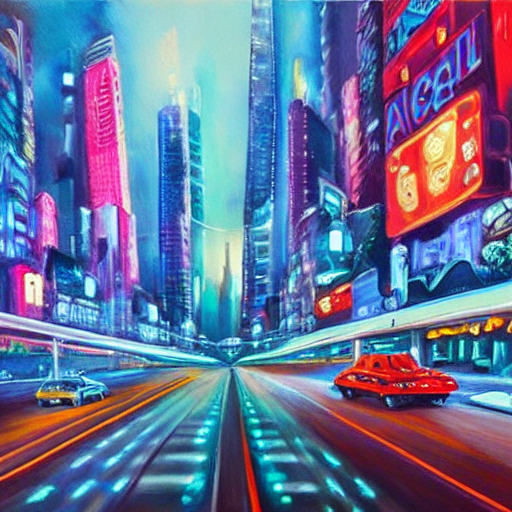

In [5]:
prompt = "A beautiful oil painting of a futuristic city with neon lights and flying cars"
image = pipe(prompt).images[0]
display(image)

### Generate Image with Hyperparameter Configuration

  0%|          | 0/30 [00:00<?, ?it/s]

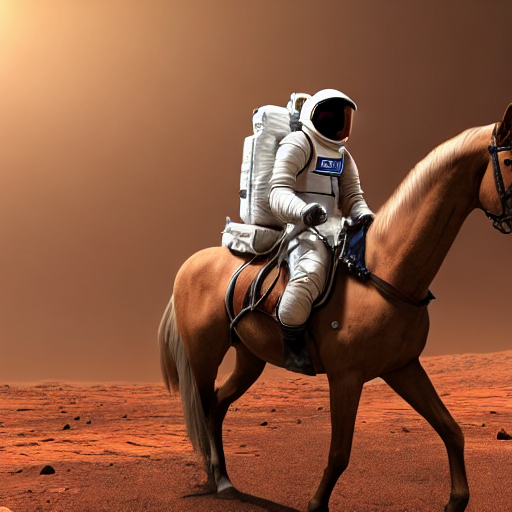

In [6]:
prompt = "An astronaut riding a horse on mars, high detail, 8k resolution"
negative_prompt = "blurry, low quality, distorted"
guidance_scale = 8.5
num_inference_steps = 30
seed = 42

generator = torch.Generator(device=device).manual_seed(seed) if seed else None

image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    generator=generator
).images[0]
display(image)

### Guidance Scale Comparison

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

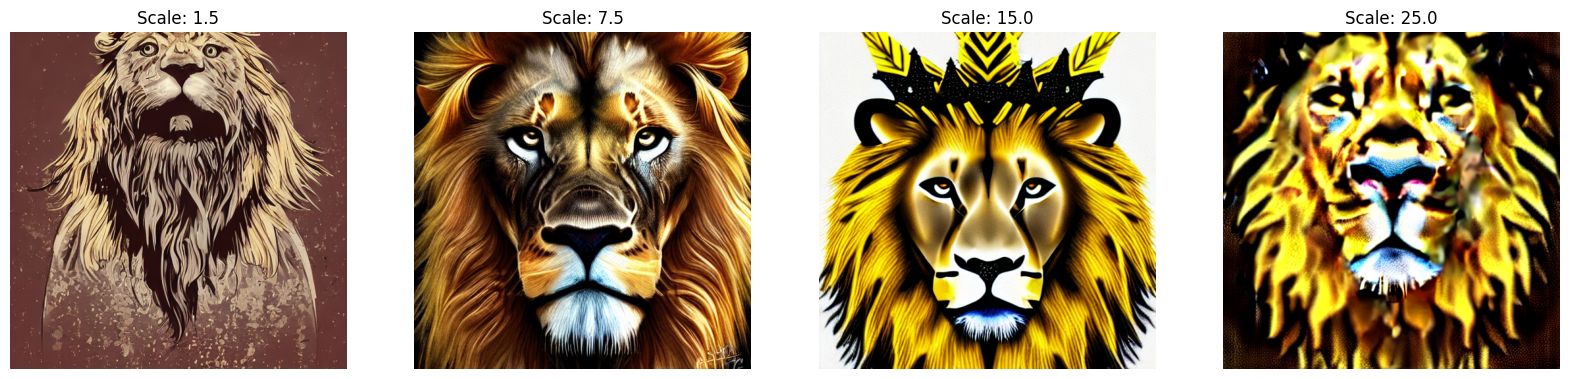

In [7]:
scales = [1.5, 7.5, 15.0, 25.0]
prompt = "A majestic lion wearing a golden crown, digital art"
images = []

for scale in scales:
    img = pipe(prompt, guidance_scale=scale, num_inference_steps=20).images[0]
    images.append(img)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title(f"Scale: {scales[i]}")
    ax.axis('off')
plt.show()

### Guidance Scale Explanation
**Analisis:**
- **Scale Rendah (1.5 - 3):** Gambar terlihat lebih abstrak dan kreatif, namun sering kali kurang mengikuti detail spesifik dari prompt. Warna cenderung lebih muted.
- **Scale Standar (7 - 9):** Keseimbangan terbaik antara kreativitas AI dan kepatuhan terhadap prompt. Detail terlihat natural dan tajam.
- **Scale Tinggi (15 - 25):** Gambar dipaksa mengikuti prompt secara kaku. Saturasi warna seringkali berlebihan (oversaturated) dan bisa muncul artefak visual atau tampilan yang 'terbakar' (fried look).

### Inference Steps Comparison

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

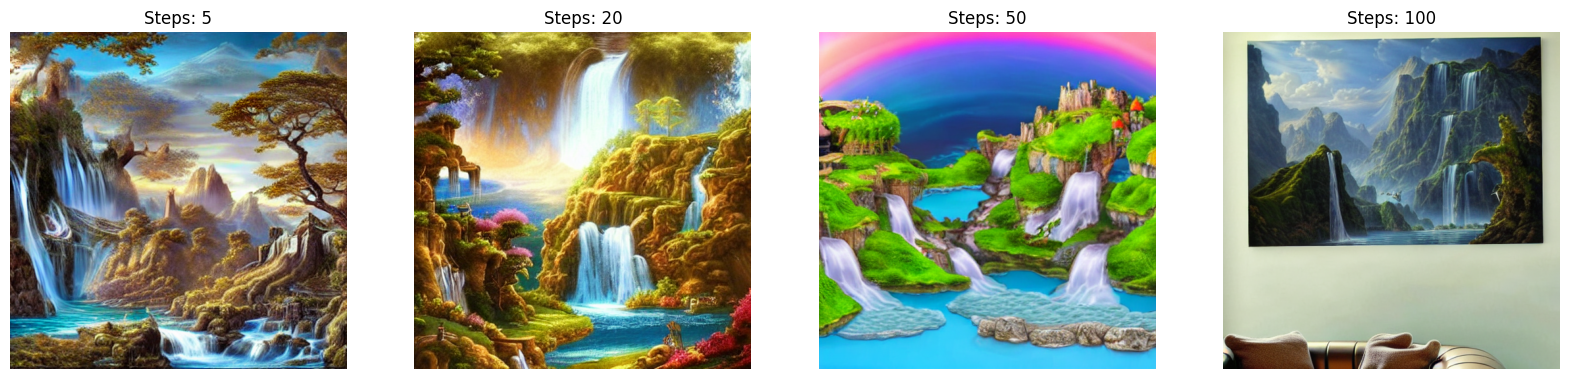

In [8]:
steps_li = [5, 20, 50, 100]
prompt = "A fantasy landscape with floating islands and waterfalls"
images = []

for s in steps_li:
    img = pipe(prompt, num_inference_steps=s).images[0]
    images.append(img)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title(f"Steps: {steps_li[i]}")
    ax.axis('off')
plt.show()

### Inference Step Explanation
**Analisis:**
- **Steps Sangat Rendah (5):** Gambar masih terlihat sangat noisy (berbintik) karena proses denoising belum selesai. Bentuk dasar sudah ada tapi detail nol.
- **Steps Menengah (20 - 30):** Detail sudah terbentuk dengan baik dan noise hampir hilang sepenuhnya. Ini adalah sweet spot untuk efisiensi waktu.
- **Steps Tinggi (50 - 100):** Detail menjadi sangat tajam dan tekstur lebih halus. Namun, peningkatan kualitas setelah 50 langkah biasanya sangat marginal dibanding waktu komputasi yang dibutuhkan.

### Batch Inference from One Prompt

  0%|          | 0/20 [00:00<?, ?it/s]

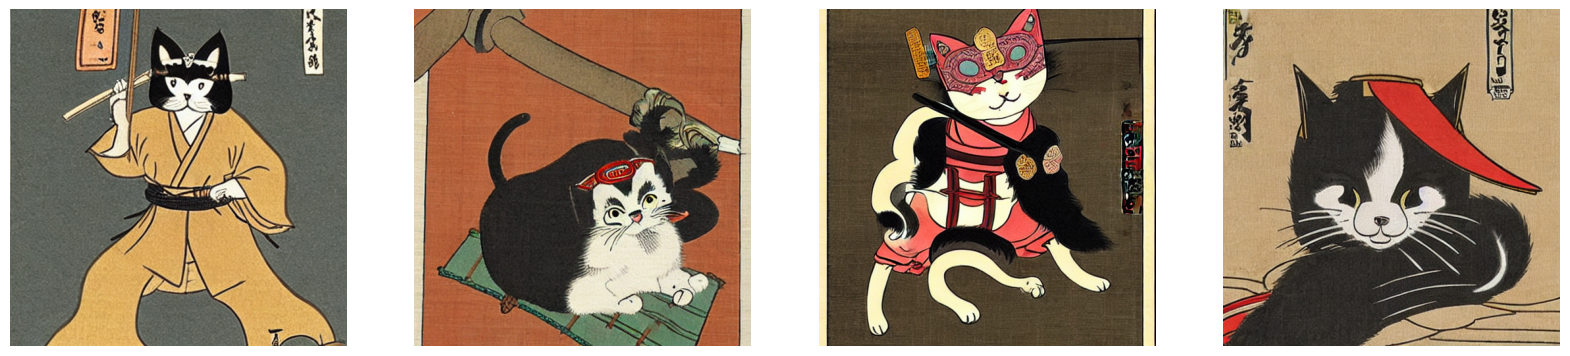

In [9]:
prompt = "Cute cat as a samurai, ukiyo-e style"
num_images = 4
images = pipe([prompt] * num_images, num_inference_steps=20).images

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.axis('off')
plt.show()

### Load Scheduler

In [10]:
# Contoh mengganti ke DPMSolver
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
print("Scheduler updated to DPMSolverMultistepScheduler")

Scheduler updated to DPMSolverMultistepScheduler


### Scheduler Comparation
**Analisis:**
- **Euler A:** Sangat cepat dan menghasilkan gambar yang 'lembut' dengan sedikit variasi pada setiap langkah. Bagus untuk draft cepat.
- **DPM++ (Multistep):** Salah satu scheduler paling canggih saat ini. Membutuhkan langkah lebih sedikit (15-20) untuk kualitas yang setara dengan Euler 50 langkah. Sangat tajam.
- **DDIM:** Scheduler klasik yang stabil. Sering digunakan untuk inpainting/img2img karena sifatnya yang deterministik jika seed-nya sama.

# Kriteria 2: Menyempurnakan Gambar Melalui Image-to-Image

### Base + Refiner Image Generation

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or aud

  0%|          | 0/15 [00:00<?, ?it/s]

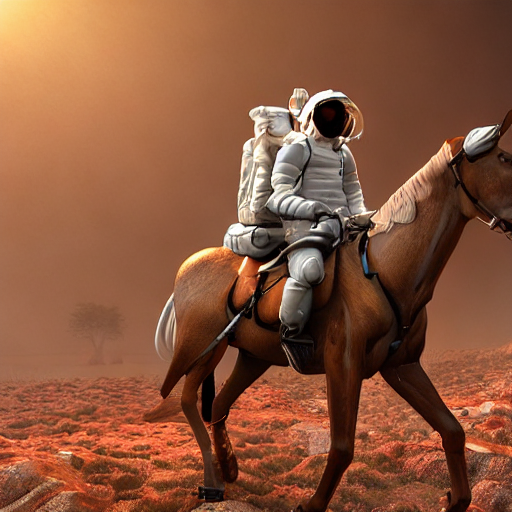

In [11]:
# Setup Img2Img Pipeline
pipe_img2img = StableDiffusionImg2ImgPipeline.from_pretrained(
    load_path,
    torch_dtype=dtype,
    safety_checker=None
).to(device)

# Prompt untuk menyempurnakan
refine_prompt = "High detail, masterpiece, sharp focus, volumetric lighting"
refined_image = pipe_img2img(
    prompt=refine_prompt,
    image=image,
    strength=0.5,
    num_inference_steps=30
).images[0]

display(refined_image)

### Inpainting

#### Load Model Inpainting

In [12]:
inpaint_model = "runwayml/stable-diffusion-inpainting"
pipe_inpaint = StableDiffusionInpaintPipeline.from_pretrained(
    inpaint_model,
    torch_dtype=dtype
).to(device)
print("Inpainting model loaded")

model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


Loading weights:   0%|          | 0/396 [00:00<?, ?it/s]

StableDiffusionSafetyChecker LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/safety_checker
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
vision_model.vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Inpainting model loaded


#### Manual Masking & Generate

  0%|          | 0/50 [00:00<?, ?it/s]

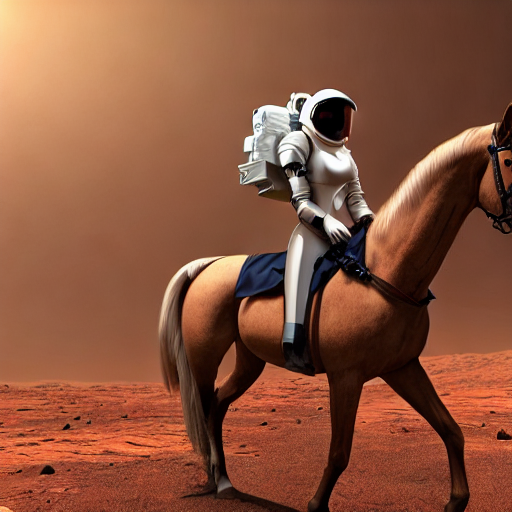

In [13]:
# Membuat mask buatan (kotak hitam di tengah)
mask = Image.new("RGB", (512, 512), "black")
from PIL import ImageDraw
draw = ImageDraw.Draw(mask)
draw.rectangle([150, 150, 350, 350], fill="white")

init_image = image.resize((512, 512))
inpaint_res = pipe_inpaint(
    prompt="A futuristic robot face",
    image=init_image,
    mask_image=mask
).images[0]
display(inpaint_res)

### Inpainting Menggunakan Automasking (Placeholder Logic)
*(Note: Biasanya menggunakan model seperti Segment Anything / YOLO)*

In [14]:
print("Implementasi segmentasi model untuk automasking akan diletakkan di sini.")
# 1. Load model segmentasi
# 2. Deteksi objek
# 3. Buat mask otomatis
# 4. Jalankan pipe_inpaint

Implementasi segmentasi model untuk automasking akan diletakkan di sini.


### Outpainting

  0%|          | 0/50 [00:00<?, ?it/s]

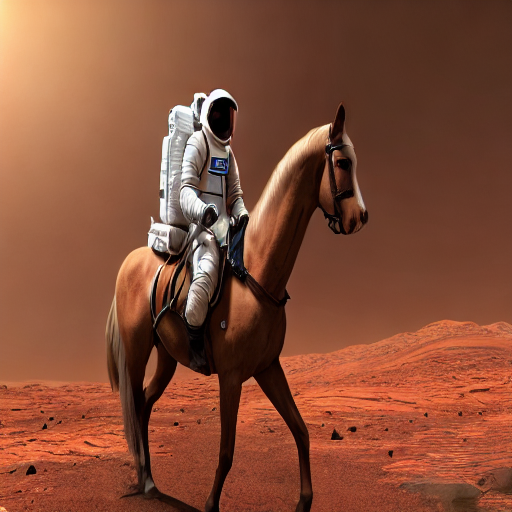

In [15]:
# Menambah canvas
orig_w, orig_h = image.size
new_img = Image.new("RGB", (orig_w + 256, orig_h), "white")
new_img.paste(image, (0, 0))
outpaint_mask = Image.new("RGB", (orig_w + 256, orig_h), "black")
draw_out = ImageDraw.Draw(outpaint_mask)
draw_out.rectangle([orig_w, 0, orig_w + 256, orig_h], fill="white")

outpaint_res = pipe_inpaint(
    prompt="extended background landscape",
    image=new_img.resize((512, 512)),
    mask_image=outpaint_mask.resize((512, 512))
).images[0]
display(outpaint_res)

### Outpainting Zoom Out

  0%|          | 0/50 [00:00<?, ?it/s]

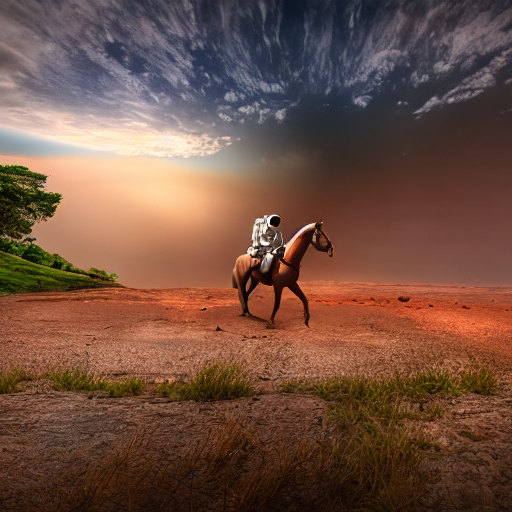

In [16]:
# Menggabungkan gambar kecil di tengah canvas besar
canvas = Image.new("RGB", (1024, 1024), "white")
canvas.paste(image.resize((256, 256)), (384, 384))
zoom_mask = Image.new("RGB", (1024, 1024), "white")
draw_z = ImageDraw.Draw(zoom_mask)
draw_z.rectangle([384, 384, 384+256, 384+256], fill="black")

zoom_out_res = pipe_inpaint(
    prompt="cinematic wide shot landscape",
    image=canvas.resize((512, 512)),
    mask_image=zoom_mask.resize((512, 512))
).images[0]
display(zoom_out_res)